<a href="https://colab.research.google.com/github/aaolcay/Convolutional-Neural-Network-Examples/blob/main/ResNet50_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from keras.applications import ResNet50
from keras.applications import imagenet_utils

In [130]:
class Predictor:
  def __init__(self, model, image, show=True):
    if show==True:
      plt.imshow(image)

    self.model = model
    self.image = image

    image_prepared = self.prepare_data()
    self.prediction(image_prepared)
  
  def prepare_data(self):
    image = self.image
    model =self.model
    input_layer_output = model.layers[0].output_shape[0]
    target_size = (input_layer_output[1], input_layer_output[2])
    image = image.resize(target_size)
    image = np.array(image)
    if len(image.shape) < 4:
      image = image[np.newaxis, ...]    
    image_prepared = imagenet_utils.preprocess_input(image)
    return image_prepared
  
  def prediction(self, image_prepared):
    model = self.model
    prediction = model.predict(image_prepared)
    self.prediction = prediction

  def result_given(self):
    return self.prediction

In [131]:
def prediction_result(image, model, show=True, num_predictions=5):
  predictor = Predictor(model, image, show)
  result = predictor.result_given()
  results = imagenet_utils.decode_predictions(result, top=num_predictions)[0]
  print(f'The top {num_predictions} predictions are\n')
  for i in range(len(results)):
    print(f'{i+1}) {results[i]}')

In [146]:
#@title Enter any url as an image to see the prediction of ResNet50 pre-trained with ImageNet {vertical-output:true}
image_url = "https://iasbh.tmgrup.com.tr/cebe2c/0/0/0/0/0/0?u=https://isbh.tmgrup.com.tr/sb/album/2018/07/15/en-guzel-turk-bayragi-resimleri-2016-turk-bayragi-resimleri-1531638269419.jpg" #@param {type:"string"}

In [147]:
image_url_resp = requests.get(image_url)
image = Image.open(BytesIO(image_url_resp.content))

In [148]:
model = ResNet50(weights = 'imagenet')

1/1 [==============================] - 1s 894ms/step
The top 10 predictions are

1) ('n03355925', 'flagpole', 0.96741074)
2) ('n03958227', 'plastic_bag', 0.020071153)
3) ('n03888257', 'parachute', 0.0065129255)
4) ('n06874185', 'traffic_light', 0.002012153)
5) ('n03916031', 'perfume', 0.0015515222)
6) ('n03976657', 'pole', 0.0005131183)
7) ('n03627232', 'knot', 0.0001972033)
8) ('n03532672', 'hook', 0.0001806911)
9) ('n03874293', 'paddlewheel', 0.00015283473)
10) ('n03871628', 'packet', 0.00011025598)


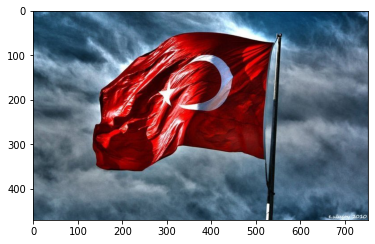

In [149]:
prediction_result(image, model, show=True, num_predictions=10)